In [12]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from sklearn.metrics import roc_curve, auc

Problem 1: Decision Trees

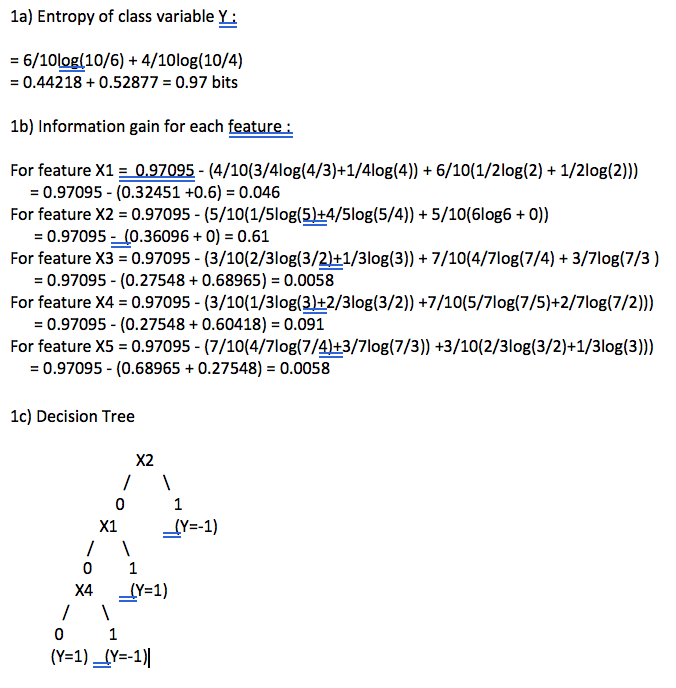

Problem 2: Decision Trees on Kaggle

2(a) Splitting training and test/validation data

Size of loaded data for training data (Xt,Yt) is 10000 (0 to 10000) and test data (Xv,Yv) is 10000 (10000 to 20000).

In [13]:
dataX = np.genfromtxt("X_train.txt",delimiter=None)
dataY = np.genfromtxt("Y_train.txt",delimiter=None)
Xt = dataX[0:10000,:]    
Yt = dataY[0:10000:]  
Xv = dataX[10000:20000,:]
Yv = dataY[10000:20000:]

2(b)

In [3]:
learner = ml.dtree.treeClassify(Xt,Yt,maxDepth=50)
mseT = learner.err(Xt,Yt)
mseV = learner.err(Xv,Yv)
print("For maxDepth = 50: ")
print("Error of Training Data = "+str(mseT))
print("Error of Test Data = "+str(mseV))

For maxDepth = 50: 
Error of Training Data = 0.0047
Error of Test Data = 0.3825


2(c)

Complexity increases with depth. The most ideal is depth = 6 because it has the least test data error. Depth lower than 6 is underfitting while depth over 6 is overfitting. MaxDepth = 6 is the optimal depth because it is right before the learner starts to overfit.

maxDepth = 0   Error of Training Data = 0.3418   Error of Test Data = 0.3419
maxDepth = 1   Error of Training Data = 0.3418   Error of Test Data = 0.3419
maxDepth = 2   Error of Training Data = 0.3223   Error of Test Data = 0.3191
maxDepth = 3   Error of Training Data = 0.3133   Error of Test Data = 0.3126
maxDepth = 4   Error of Training Data = 0.3105   Error of Test Data = 0.3152
maxDepth = 5   Error of Training Data = 0.3008   Error of Test Data = 0.3102
maxDepth = 6   Error of Training Data = 0.2949   Error of Test Data = 0.3103
maxDepth = 7   Error of Training Data = 0.2871   Error of Test Data = 0.3113
maxDepth = 8   Error of Training Data = 0.2768   Error of Test Data = 0.3132
maxDepth = 9   Error of Training Data = 0.2632   Error of Test Data = 0.3189
maxDepth = 10   Error of Training Data = 0.2457   Error of Test Data = 0.3237
maxDepth = 11   Error of Training Data = 0.2302   Error of Test Data = 0.3266
maxDepth = 12   Error of Training Data = 0.2104   Error of Test Data = 0.3

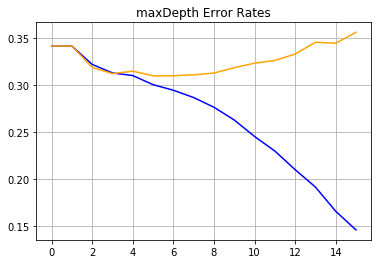

In [4]:
mseTL = []
mseVL = []
for r in range(0,16):
    learner2 = ml.dtree.treeClassify(Xt,Yt,maxDepth=r)

    mseT2 = learner2.err(Xt,Yt)
    mseV2 = learner2.err(Xv,Yv)
    mseTL.append(mseT2)
    mseVL.append(mseV2)
    print("maxDepth = "+str(r)+"   Error of Training Data = "+str(mseT2)+"   Error of Test Data = "+str(mseV2))

_,axis = plt.subplots()
plt.title("maxDepth Error Rates")
axis.plot(mseTL, c='blue')
axis.plot(mseVL, c='orange')
plt.grid(True)
plt.show()
print("")

2(d) Test with minLeaf

Complexity decreases as the minLeaf increases because the training data error continues to increase with higher minLeaf. The most ideal minLeaf is 128 because thats where the test data error is the lowest. minLeaf lower than 128 is overfitting the model while minLeaf higher is underfitting. 

minLeaf = 4   Error of Training Data = 0.0964   Error of Test Data = 0.3809
minLeaf = 8   Error of Training Data = 0.1693   Error of Test Data = 0.3735
minLeaf = 16   Error of Training Data = 0.2262   Error of Test Data = 0.3557
minLeaf = 32   Error of Training Data = 0.2637   Error of Test Data = 0.3335
minLeaf = 64   Error of Training Data = 0.2899   Error of Test Data = 0.3274
minLeaf = 128   Error of Training Data = 0.3012   Error of Test Data = 0.3119
minLeaf = 256   Error of Training Data = 0.3085   Error of Test Data = 0.3172
minLeaf = 512   Error of Training Data = 0.3135   Error of Test Data = 0.3127
minLeaf = 1024   Error of Training Data = 0.3223   Error of Test Data = 0.3191
minLeaf = 2048   Error of Training Data = 0.3418   Error of Test Data = 0.3419
minLeaf = 4096   Error of Training Data = 0.3418   Error of Test Data = 0.3419


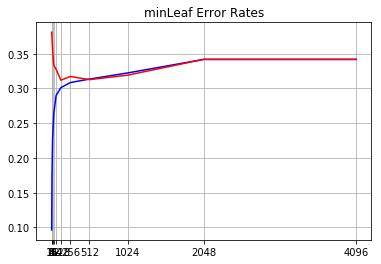

In [5]:
mseTL = []
mseVL = []
for r in range(2,13):
    learner2 = ml.dtree.treeClassify(Xt,Yt,maxDepth=50,minLeaf=2**r)
    mseT2 = learner2.err(Xt,Yt)
    mseV2 = learner2.err(Xv,Yv)
    mseTL.append(mseT2)
    mseVL.append(mseV2)
    print("minLeaf = "+str(2**r)+"   Error of Training Data = "+str(mseT2)+"   Error of Test Data = "+str(mseV2))
_,axis = plt.subplots()
plt.title("minLeaf Error Rates")
axis.plot([4,8,16,32,64,128,256,512,1024,2048,4096],mseTL, c='blue')
axis.plot([4,8,16,32,64,128,256,512,1024,2048,4096],mseVL, c='red')
axis.set_xticks([4,8,16,32,64,128,256,512,1024,2048,4096])
plt.grid(True)
plt.show()
print("")

2(e) Test with minParent

minParent = 4   Error of Training Data = 0.0239   Error of Test Data = 0.3766
minParent = 8   Error of Training Data = 0.0646   Error of Test Data = 0.3767
minParent = 16   Error of Training Data = 0.1199   Error of Test Data = 0.3766
minParent = 32   Error of Training Data = 0.183   Error of Test Data = 0.3667
minParent = 64   Error of Training Data = 0.2238   Error of Test Data = 0.347
minParent = 128   Error of Training Data = 0.2611   Error of Test Data = 0.3358
minParent = 256   Error of Training Data = 0.2821   Error of Test Data = 0.3197
minParent = 512   Error of Training Data = 0.302   Error of Test Data = 0.3121
minParent = 1024   Error of Training Data = 0.3078   Error of Test Data = 0.3149
minParent = 2048   Error of Training Data = 0.3218   Error of Test Data = 0.3192
minParent = 4096   Error of Training Data = 0.3418   Error of Test Data = 0.3419


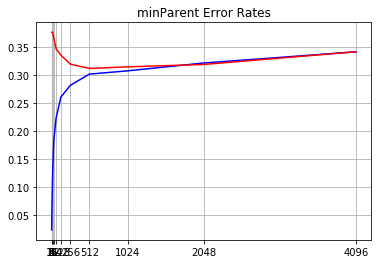

In [6]:
mseTL = []
mseVL = []
for r in range(2,13):
    learner2 = ml.dtree.treeClassify(Xt,Yt,maxDepth=50,minParent=2**r)
    mseT2 = learner2.err(Xt,Yt)
    mseV2 = learner2.err(Xv,Yv)
    mseTL.append(mseT2)
    mseVL.append(mseV2)
    print("minParent = "+str(2**r)+"   Error of Training Data = "+str(mseT2)+"   Error of Test Data = "+str(mseV2))
_,axis = plt.subplots()
plt.title("minParent Error Rates")
axis.plot([4,8,16,32,64,128,256,512,1024,2048,4096],mseTL, c='blue')
axis.plot([4,8,16,32,64,128,256,512,1024,2048,4096],mseVL, c='red')
axis.set_xticks([4,8,16,32,64,128,256,512,1024,2048,4096])
plt.grid(True)
plt.show()

2(f)

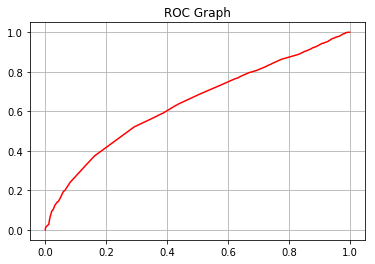

AUC for maxDepth=8 is 0.6411092690235956



In [17]:
learner = ml.dtree.treeClassify(Xt,Yt,maxDepth=8)    
ROC = learner.roc(Xv,Yv)
plt.plot(ROC[0],ROC[1], c='red')
plt.title("ROC Graph")
plt.grid(True)
plt.show()
AUC = learner.auc(Xv,Yv)
print("AUC for maxDepth=8 is "+str(AUC))
print("")

2(g)

maxdepth=8 minParent=512 minLeaf=256

In [8]:
nXv = np.genfromtxt("X_test.txt",delimiter=None)
learner = ml.dtree.treeClassify(Xt,Yt,maxDepth=8,minLeaf=256,minParent=512)  
Ypred = learner.predictSoft(nXv)
np.savetxt('Yhat_dtree.txt',np.vstack( (np.arange(len(Ypred)) , Ypred[:,1]) ).T,'%d, %.2f',header='ID,Prob1',comments='',delimiter=',');

Kaggle score for Yhat_dtree.txt prediction file is 0.64991

Problem 3:

3(a)

1  Ensemble Members: mseTR = 0.229  mseTE = 0.3583
5  Ensemble Members: mseTR = 0.12976800000000002  mseTE = 0.23926800000000004
10  Ensemble Members: mseTR = 0.121629  mseTE = 0.22474699999999997
25  Ensemble Members: mseTR = 0.11527632000000002  mseTE = 0.21616671999999998


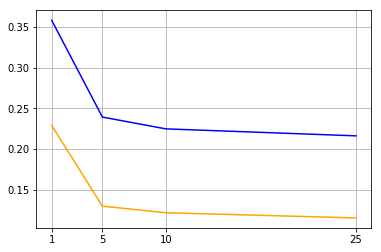

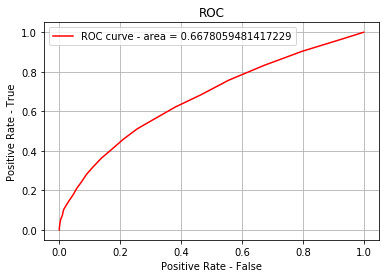

In [9]:
ensemble = [0]*25
Ythat = np.zeros((np.size(Yt),25))
Yvhat = np.zeros((np.size(Yv),25))
for i in range(25):
    Xb,Yb = ml.bootstrapData(Xt,Yt)
    ensemble[i] = ml.dtree.treeClassify(Xb,Yb,maxDepth=15,minLeaf=4,nFeatures=8)
    Ythat[:,i] = ensemble[i].predict(Xt)
    Yvhat[:,i] = ensemble[i].predict(Xv)
mseTR = []
mseTE = []
for i, v in enumerate([1,5,10,25]):    
    mseTR.append(np.mean( (Yt-np.mean(Ythat[:,0:v],1))**2 ))     
    mseTE.append(np.mean( (Yv-np.mean(Yvhat[:,0:v],1))**2 ))
    print(str(v)+"  Ensemble Members: mseTR = "+str(mseTR[i])+"  mseTE = "+str(mseTE[i]))   
_,axis = plt.subplots()
axis.plot([1,5,10,25],mseTR, c='orange')
axis.plot([1,5,10,25],mseTE, c='blue')
axis.set_xticks([1,5,10,25])
plt.grid(True)
plt.show()
vaPred = np.mean(np.array(Yvhat),axis=1);
fpr,tpr,_ = roc_curve(Yv, vaPred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red',label='ROC curve - area = '+str(roc_auc))
plt.legend();
plt.xlabel('Positive Rate - False');
plt.ylabel('Positive Rate - True');
plt.title('ROC');
plt.grid(True)
plt.show()

3(b)

In [20]:
ensemble2 = [0]*25
Xv = np.genfromtxt("X_test.txt",delimiter=None)
Ypred2 = np.zeros((np.size(Xv,0),1))
for i in range(25):
    Xb,Yb = ml.bootstrapData(Xt,Yt)
    ensemble2[i] = ml.dtree.treeClassify(Xb,Yb,maxDepth=8,minLeaf=128,nFeatures=8,minParent=512)
    Ypred2 = Ypred2 + ensemble2[i].predictSoft(Xv)
Ypred2 = Ypred2/25
print("AUC after 25 learners = " + str(ensemble2[24].auc(Xb,Yb)))
np.savetxt('Ypred.txt',np.vstack( (np.arange(len(Ypred2)) , Ypred2[:,1]) ).T,'%d, %.2f',header='ID,Prob1',comments='',delimiter=',');

AUC after 25 learners = 0.7036601759040337


Kaggle score for Ypred.txt prediction file is 0.67077